##Machine Learning: Classification Models using the PIMA dataset

The PIMA Indians dataset obtained from the UCI Machine Learning Repository. The goal is to predict whether or not a given female patient will contract diabetes based on features such as BMI, age, and number of pregnancies. Therefore, it is a binary classification problem. A target value of 0 indicates that the patient does not have diabetes, while a value of 1 indicates that the patient does have diabetes.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
col_names=['pregnancies',  'glucose', 'diastolic','triceps','insulin', 'bmi', 'dpf','age','diabetes']
df=pd.read_csv('/content/drive/MyDrive/pima-indians-diabetes.csv', names=col_names,header=None)

###Explore the Dataset¶

In [4]:
df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info(); #df.isnull().sum() # check how many missing values exist in the collection

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   diastolic    768 non-null    int64  
 3   triceps      768 non-null    int64  
 4   insulin      768 non-null    int64  
 5   bmi          768 non-null    float64
 6   dpf          768 non-null    float64
 7   age          768 non-null    int64  
 8   diabetes     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


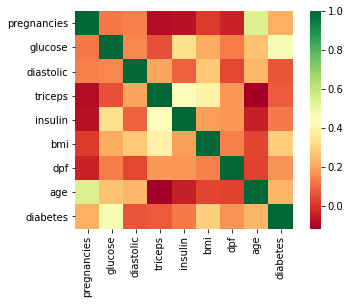

In [6]:
#See features which are positively correlated with diabetes, and which ones are negatively correlated.
import seaborn as sns
sns.heatmap(df.corr(), square=True, cmap='RdYlGn') #df.corr() computes the pairwise correlation between columns:

In [7]:
y=df['diabetes']
X=df.drop('diabetes', axis=1)

The features (X) include the following fields:

age: (years)
Systolic_BP: Systolic blood pressure (mmHg)
Diastolic_BP: Diastolic blood pressure (mmHg)
Cholesterol: (mg/DL)
We can use the head() method to display the first few records of each.

The target (y) is an indicator of whether or not the patient has diabetes.

y = 1 : patient has retinopathy.
y = 0 : patient does not have retinopathy.

In [8]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: diabetes, dtype: int64

### Data Distribution
Many algorithms may assume that data is normally distributed, or at least that 
all  columns are on the same scale. This will often not be the case, e.g. one feature may be measured in thousands of dollars while another would be number of years.

In [9]:
df.describe()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


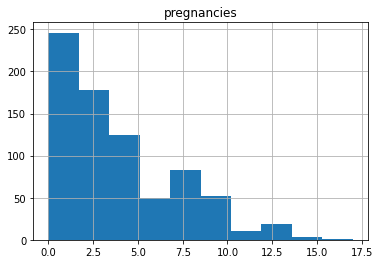

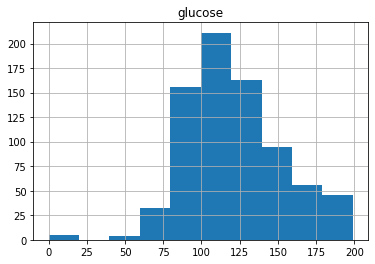

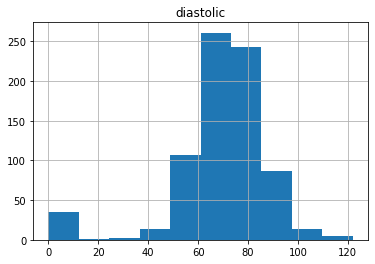

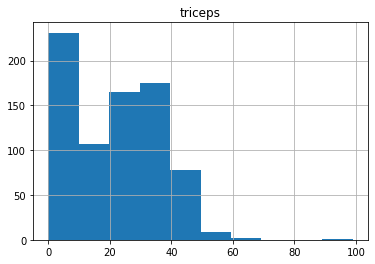

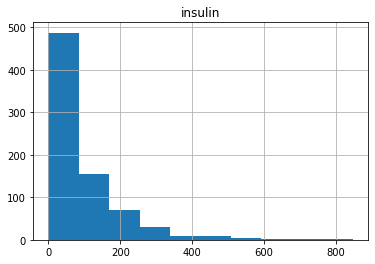

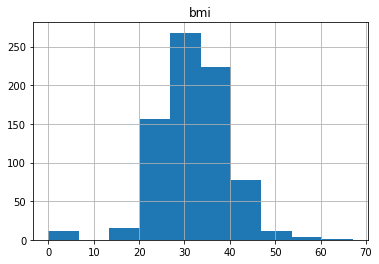

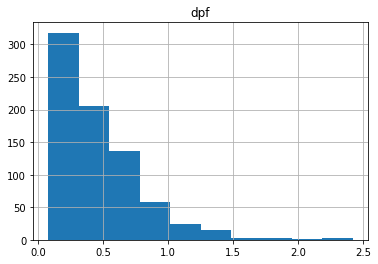

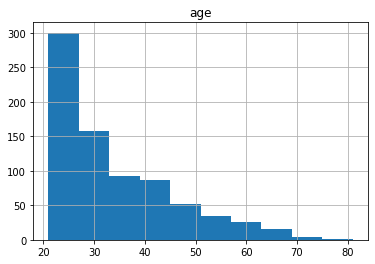

In [10]:
#Plot the histograms of each column of X below:
for col in X.columns:
    X.loc[:, col].hist()
    plt.title(col)
    plt.show()

The distributions have a generally bell shaped distribution, but with slight rightward skew. Many statistical models assume that the data is normally distributed, forming a symmetric Gaussian bell shape (with no skew)

In [11]:
np.random.normal(50,12, 5000)

array([72.63597227, 60.23111623, 54.01320598, ..., 46.77321491,
       37.12478036, 39.34040032])

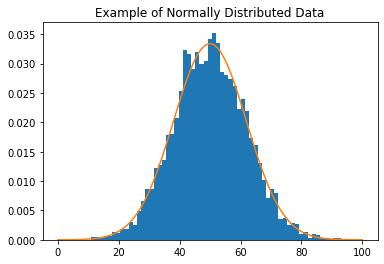

In [12]:
from scipy.stats import norm
data = np.random.normal(50,12, 5000)
fitting_params = norm.fit(data)
norm_dist_fitted = norm(*fitting_params)
t = np.linspace(0,100, 100)
plt.hist(data, bins=60, density=True)
plt.plot(t, norm_dist_fitted.pdf(t))
plt.title('Example of Normally Distributed Data')
plt.show()

Imputing missing data 

In [13]:
feature_list=['glucose','diastolic','insulin','triceps','bmi','age'] # these features cannot possibly have a min which is equal to zero, therefore we will fill them with nan to impute them later
for i in feature_list:
  #print([X[i]==0])
  X[i]=X[i].replace(0, np.nan)
print(X)


     pregnancies  glucose  diastolic  triceps  insulin   bmi    dpf  age
0              6    148.0       72.0     35.0      NaN  33.6  0.627   50
1              1     85.0       66.0     29.0      NaN  26.6  0.351   31
2              8    183.0       64.0      NaN      NaN  23.3  0.672   32
3              1     89.0       66.0     23.0     94.0  28.1  0.167   21
4              0    137.0       40.0     35.0    168.0  43.1  2.288   33
..           ...      ...        ...      ...      ...   ...    ...  ...
763           10    101.0       76.0     48.0    180.0  32.9  0.171   63
764            2    122.0       70.0     27.0      NaN  36.8  0.340   27
765            5    121.0       72.0     23.0    112.0  26.2  0.245   30
766            1    126.0       60.0      NaN      NaN  30.1  0.349   47
767            1     93.0       70.0     31.0      NaN  30.4  0.315   23

[768 rows x 8 columns]


In [14]:
print(X.isnull().sum())

pregnancies      0
glucose          5
diastolic       35
triceps        227
insulin        374
bmi             11
dpf              0
age              0
dtype: int64


In [15]:
X.describe()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [16]:
#Dropping missing data
X_nozeros=X.dropna() 
X_nozeros.shape ## this drops about half of the data which contain missing values(i.e features which have 0's) therefore we will impute the data instead of dropping it

(392, 8)

In [17]:
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputed_X = pd.DataFrame(my_imputer.fit_transform(X))
# Imputation removed column names; put them back
imputed_X.columns = X.columns
X=imputed_X

In [18]:
X.isnull().sum()

pregnancies    0
glucose        0
diastolic      0
triceps        0
insulin        0
bmi            0
dpf            0
age            0
dtype: int64

### Scaling the features

In [19]:
X.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age
0,6.0,148.0,72.0,35.0,105.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,105.0,26.6,0.351,31.0
2,8.0,183.0,64.0,32.0,105.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0


In [20]:
# Create training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.4, random_state=42)

A non-linear relationship might exist between the variables and the class. To test the hypothesis, we construct a non-linear transformation of the feature. 
Assess which of the five features is better at predicting the class using SelectKBest() and the chi2() metric.

In [21]:
 from sklearn.feature_selection import SelectKBest, chi2
# Apply SelectKBest with chi2 and pick top 5 features
vt = SelectKBest(chi2, k=5).fit(X_train, y_train)

# Create a  dataset containing the selected features
X_train_reduced = vt.transform(X_train)
X_train=pd.DataFrame(X_train_reduced, columns=['Pregancies','Glucose','Insulin','BMI','Age'])
X_test_reduced = vt.transform(X_test)
X_test=pd.DataFrame(X_test_reduced, columns=['Pregancies','Glucose','Insulin','BMI','Age'])

X_train.head()


,Pregancies,Glucose,Insulin,BMI,Age
0,0.0,94.0,105.0,32.0,25.0
1,8.0,125.0,105.0,32.0,54.0
2,1.0,111.0,105.0,30.1,23.0
3,7.0,196.0,105.0,39.8,41.0
4,2.0,158.0,105.0,31.6,66.0


Transform  data so that the distributions are closer to standard normal distributions.

First we will remove some of the skew from the distribution by using the log transformation. Then we will "standardize" the distribution so that it has a mean of zero and standard deviation of 1. A standard normal distribution has mean of zero and standard deviation of 1.

In [22]:
def make_standard_normal(df_train, df_test):
    """
    To make the data closer to a normal distribution, take log
    transforms to reduce the skew.
    Then standardize the distribution with a mean of zero and standard deviation of 1. 
  
    Args:
      df_train (dataframe): unnormalized training data.
      df_test (dataframe): unnormalized test data.
  
    Returns:
      df_train_normalized (dateframe): normalized training data.
      df_test_normalized (dataframe): normalized test data.
    """ 
    # Remove skew by applying the log function to the train set, and to the test set
    np.seterr(divide = 'ignore')
    df_train_unskewed = np.where(df_train>0, np.log(df_train), 0)
    df_test_unskewed = np.where(df_test>0, np.log(df_test), 0)
    
    
    #calculate the mean and standard deviation of the training set
    mean = df_train_unskewed.mean(axis = 0) # along the column
    stdev = df_train_unskewed.std(axis = 0, ddof=1)
    
    # standardize the training set
    df_train_standardized = (df_train_unskewed - mean)/ stdev
    
    # standardize the test set (see instructions and hints above)
    df_test_standardized = (df_test_unskewed - mean) / stdev
    
    df_train_standardized=pd.DataFrame(df_train_standardized)
    df_test_standardized=pd.DataFrame(df_test_standardized)
 
    return df_train_standardized, df_test_standardized

Transform training and test data


In [23]:
#Using the above function implemented to make the traina dn test data distribution closer to a standard normal distribution.
X_train_transformed, X_test_transformed= make_standard_normal(X_train, X_test)

In [24]:
X_train_transformed.columns = X_train.columns
X_test_transformed.columns  = X_test.columns
X_train_transformed.head()

,Pregancies,Glucose,Insulin,BMI,Age
0,-1.200986,-0.933632,-0.150861,0.056057,-0.696284
1,1.249639,0.208870,-0.150861,0.056057,1.698173
2,-1.200986,-0.267275,-0.150861,-0.236237,-0.955538
3,1.092272,2.011904,-0.150861,1.097676,0.841849
4,-0.384111,1.147990,-0.150861,-0.004010,2.322107


In [25]:
print(f"Training set transformed  has mean {X_train_transformed.mean(axis=0)} and standard deviation {X_train_transformed.std(axis=0)} ")
print(f"Test set transformed,  has mean {X_test_transformed.mean(axis=0)} and standard deviation {X_test_transformed.std(axis=0)}")
print(f"Skew of training set  before transformation: {X_train.skew(axis=0)}")
print(f"Skew of training set  after transformation: {X_test_transformed.skew(axis=0)}")
print(f"Skew of test set  before transformation: {X_test.skew(axis=0)}")
print(f"Skew of test set  after transformation: {X_test_transformed.skew(axis=0)}")

Training set transformed  has mean Pregancies    7.433667e-17
Glucose       2.351983e-15
Insulin      -1.657129e-15
BMI           1.821248e-15
Age           4.189885e-16
dtype: float64 and standard deviation Pregancies    1.0
Glucose       1.0
Insulin       1.0
BMI           1.0
Age           1.0
dtype: float64 
Test set transformed,  has mean Pregancies    0.058582
Glucose      -0.070246
Insulin       0.019550
BMI           0.043199
Age           0.046414
dtype: float64 and standard deviation Pregancies    1.019741
Glucose       1.006484
Insulin       1.041644
BMI           1.017696
Age           1.009348
dtype: float64
Skew of training set  before transformation: Pregancies    0.941575
Glucose       0.560745
Insulin       3.751531
BMI           0.481512
Age           1.152532
dtype: float64
Skew of training set  after transformation: Pregancies    0.058900
Glucose       0.036736
Insulin       0.095782
BMI          -0.041064
Age           0.588278
dtype: float64
Skew of test set  befo

After transforming the training and test sets, the training is set to be  centered at zero with a standard deviation of  1

Observing the test set during model training is avoided in order to avoid biasing the model training process. The distributions of the transformed training data can be looked at 

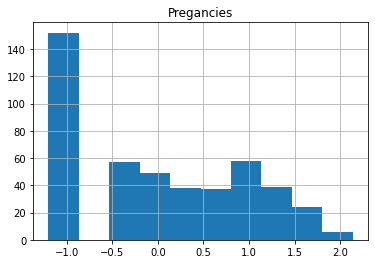

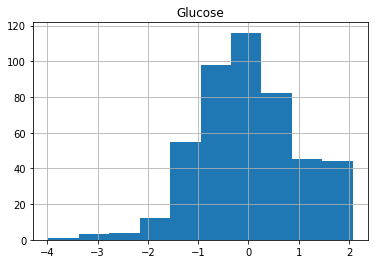

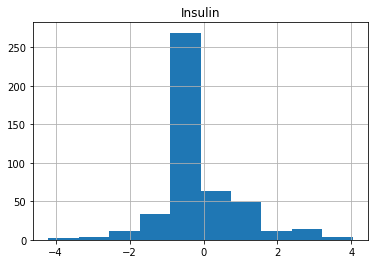

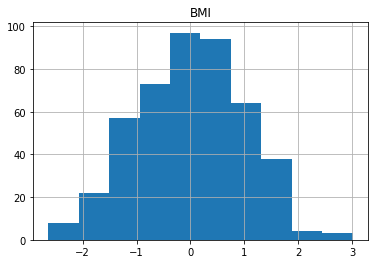

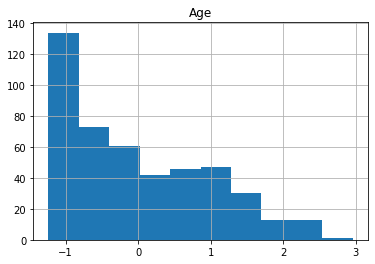

In [26]:
for col in X_train_transformed.columns:
    X_train_transformed[col].hist()
    plt.title(col)
    plt.show()

In [27]:
# Find the mean and standard dev
def statsitical_outlier_removal(X_train, X_test, col):
    """
    Use statistical outlier removal- 
    remove data that sits more than three standard deviations away from the mean in both the directions. 
  
    Args:
      df_train (dataframe):  training data.
      df_test (dataframe):  test data.
  
    Returns:
      df_train_trimmed (dateframe): trimmed training data.
      df_test_trimmed (dataframe):  trimmed test data.
    """ 
    std = X_train[col].std()
    mean = X_train[col].mean()

    # Calculate the cutoff
    cut_off = std * 3
    lower, upper = mean - cut_off, mean+cut_off

    # Trim the outliers
    trimmed_df_train = X_train[(X_train[col] < upper) & (X_train[col] > lower)]
    trimmed_df_test = X_test[(X_train[col] < upper) & (X_test[col] > lower)] #Applying statistical outlier removal on test data using mean and std of training data- as we assume we won't know anything about your upcoming/test data
    return trimmed_df_train, trimmed_df_test

In [28]:
for col in X_train_transformed.columns:
    X_train, X_test=statsitical_outlier_removal(X_train_transformed,X_test_transformed,col)
    X_train=pd.DataFrame(X_train)
    X_test=pd.DataFrame(X_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [29]:
X_train.head()

,Pregancies,Glucose,Insulin,BMI,Age
0,-1.200986,-0.933632,-0.150861,0.056057,-0.696284
1,1.249639,0.208870,-0.150861,0.056057,1.698173
2,-1.200986,-0.267275,-0.150861,-0.236237,-0.955538
3,1.092272,2.011904,-0.150861,1.097676,0.841849
4,-0.384111,1.147990,-0.150861,-0.004010,2.322107


In [30]:
X_test.head()

,Pregancies,Glucose,Insulin,BMI,Age
0,0.910605,-0.766587,1.039854,0.345551,0.989936
1,-0.384111,-0.231324,-0.150861,0.578534,-1.238392
2,-0.384111,-0.377104,-0.150861,-0.126457,-1.238392
3,1.249639,-0.414393,-0.150861,-1.199771,0.259762
4,1.092272,0.546953,-0.150861,-0.268072,1.458882


###K-Nearest Neighbors Classification (knn)

In [31]:
# Import KNN
from sklearn.neighbors import KNeighborsClassifier

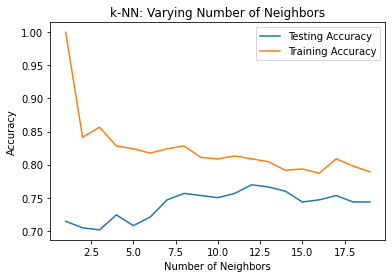

In [32]:
neighbors = np.arange(1, 20)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train,y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train,y_train)

    #Compute accuracy on the testing set of the classifier's predictions
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


Hyperparameter tuning 

In [33]:
# Import necessary modules
from sklearn.model_selection import GridSearchCV

# Setup the hyperparameter grid
param_grid = {'n_neighbors': np.arange(1,20)}

# Instantiate a logistic regression classifier: logreg
knn = KNeighborsClassifier()

# Instantiate the GridSearchCV object: logreg_cv
knn_cv = GridSearchCV(knn, param_grid, cv=5)

# Fit it to the data
knn_cv.fit(X_train,y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(knn_cv.best_params_)) 
print("Best score is {}".format(knn_cv.best_score_))

Tuned Logistic Regression Parameters: {'n_neighbors': 7}
Best score is 0.7717391304347826


Evaluating model performance

In [34]:
# Evaluating a model with tuned hyperparameters on a hold-out set
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# Predict the labels of the test data: y_pred
y_pred = knn_cv.predict(X_test)
#Compute the accuracy of the classification model
print("model score: %.3f" % knn_cv.score(X_test, y_test))
# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

model score: 0.747
[[165  41]
 [ 37  65]]
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       206
           1       0.61      0.64      0.62       102

    accuracy                           0.75       308
   macro avg       0.72      0.72      0.72       308
weighted avg       0.75      0.75      0.75       308



AUC: 0.719112887873596


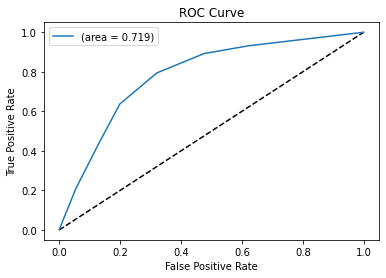

In [35]:
# Import necessary modules
from sklearn.metrics import roc_curve, roc_auc_score
# Compute predicted probabilities: y_pred_prob
y_pred_prob = knn_cv.predict_proba(X_test)[:,1] #chose the second column, index=1 which is the prob of predicted label being 1
auc_value=roc_auc_score(y_test, y_pred)
print("AUC: {}".format(auc_value))
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='(area = {:.3f})'.format(auc_value)) #ROC curve provides a nice visual way to assess  classifier's performance
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

###Logistic Regression

In [36]:
#Import Logisitc Regression
from sklearn.linear_model import LogisticRegression

Hyperparameter tuning

In [37]:
#Logistic regression also has a regularization parameter: C controls the inverse of the regularization strength. 
#A large C can lead to an overfit model, while a small  can lead to an underfit model.

# Create the hyperparameter grid

param_grid = {'C': np.logspace(-5, 8, 15)}

# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression(max_iter=4000)

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg,param_grid,cv=5)

# Fit it to the training data
logreg_cv.fit(X_train,y_train)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))


Tuned Logistic Regression Parameter: {'C': 0.05179474679231213}
Tuned Logistic Regression Accuracy: 0.7652173913043478


Evaluating performance


In [38]:
#Evaluating a model with tuned hyperparameters on a hold-out set
# Predict the labels of the test set: y_pred
y_pred = logreg_cv.predict(X_test)
# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[173  33]
 [ 41  61]]
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       206
           1       0.65      0.60      0.62       102

    accuracy                           0.76       308
   macro avg       0.73      0.72      0.72       308
weighted avg       0.76      0.76      0.76       308



AUC: 0.7189225204644965


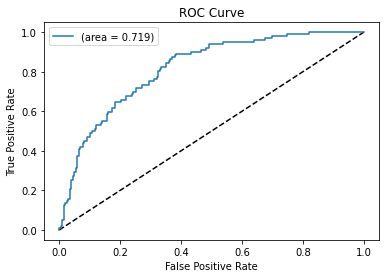

In [39]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg_cv.predict_proba(X_test)[:,1] 
auc_value=roc_auc_score(y_test, y_pred)
print("AUC: {}".format(auc_value))
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='(area = {:.3f})'.format(auc_value)) 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

###Decision Trees

In [40]:
#Import Decision Tree
from sklearn.tree import DecisionTreeClassifier

Hyperparameter tuning

In [41]:
# Import necessary modules
from scipy.stats import randint

from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 4),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
# #RandomizedSearchCV will never outperform GridSearchCV. Instead, it is valuable because it saves on computation time.
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X_train,y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 1, 'min_samples_leaf': 3}
Best score is 0.726086956521739


Evaluating the model

In [42]:
# Evaluating a model with tuned hyperparameters on a hold-out set
#Predict the labels of the test set: y_pred
y_pred = tree_cv.predict(X_test)
#Compute the accuracy of the classification model
print("model score: %.3f" % tree_cv.score(X_test, y_test))
# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

model score: 0.643
[[159  47]
 [ 63  39]]
              precision    recall  f1-score   support

           0       0.72      0.77      0.74       206
           1       0.45      0.38      0.41       102

    accuracy                           0.64       308
   macro avg       0.58      0.58      0.58       308
weighted avg       0.63      0.64      0.63       308



AUC: 0.5770988006853227


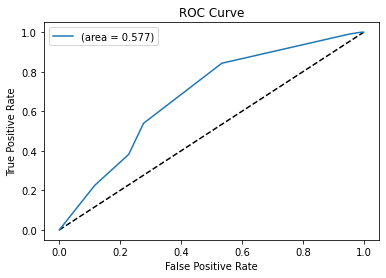

In [43]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = tree_cv.predict_proba(X_test)[:,1] 
auc_value=roc_auc_score(y_test, y_pred)
print("AUC: {}".format(auc_value))
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='(area = {:.3f})'.format(auc_value)) 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

### Random Forest Classifier

In [44]:
# Import the necessary modules
from sklearn.ensemble import RandomForestClassifier

Hypertuning

In [45]:
# Set a range for n_estimators from 10 to 40 in steps of 10
param_grid = {'n_estimators': range(10, 50, 10)}
# Optimize for a RandomForestClassifier() using GridSearchCV
rf = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
rf.fit(X_train, y_train)
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(rf.best_params_))
print("Best score is {}".format(rf.best_score_))

Tuned Decision Tree Parameters: {'n_estimators': 40}
Best score is 0.75


Evalution of the model

In [46]:
# Evaluating a model with tuned hyperparameters on a hold-out set
#Predict the labels of the test set: y_pred
y_pred = rf.predict(X_test)
#Compute the accuracy of the classification model
print("model score: %.3f" % rf.score(X_test, y_test))
# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

model score: 0.776
[[169  37]
 [ 32  70]]
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       206
           1       0.65      0.69      0.67       102

    accuracy                           0.78       308
   macro avg       0.75      0.75      0.75       308
weighted avg       0.78      0.78      0.78       308



AUC: 0.7533314296592423


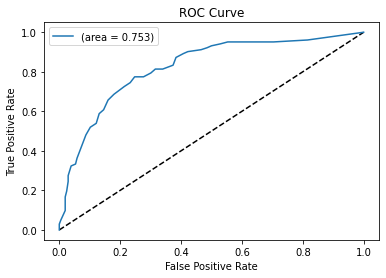

In [47]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = rf.predict_proba(X_test)[:,1] 
auc_value=roc_auc_score(y_test, y_pred)
print("AUC: {}".format(auc_value))
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='(area = {:.3f})'.format(auc_value)) 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

###Support vector machine (SVM)

In [48]:
# Import the necessary modules
from sklearn.svm import SVC #Support vector classifier type of SVM

Hypertuning

In [49]:
#SVM classification

# Specify the hyperparameter space
parameters = {'C':[1, 10, 100], #  C controls the regularization strength
              'gamma':[0.1, 0.01],
              'kernel':['linear', 'poly', 'rbf', 'sigmoid']
              } #Gamma controls the kernel coefficient

# Instantiate the GridSearchCV object: cv
clf = GridSearchCV(SVC(probability=True), parameters, cv=5)

# Fit to the training set
clf.fit(X_train,y_train)

# Predict the labels of the test set: y_pred
y_pred = clf.predict(X_test)

Evalution of the model

In [50]:
# Compute and print metrics
print("Accuracy: {}".format(clf.score(X_test, y_test)))
# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(clf.best_params_))

Accuracy: 0.7662337662337663
[[173  33]
 [ 39  63]]
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       206
           1       0.66      0.62      0.64       102

    accuracy                           0.77       308
   macro avg       0.74      0.73      0.73       308
weighted avg       0.76      0.77      0.76       308

Tuned Model Parameters: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}


AUC: 0.7287264420331239


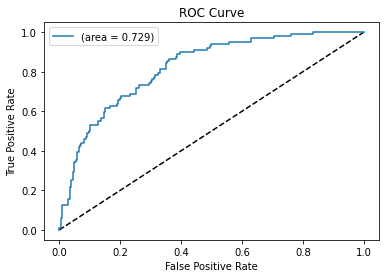

In [51]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = clf.predict_proba(X_test)[:,1] 
auc_value=roc_auc_score(y_test, y_pred)
print("AUC: {}".format(auc_value))
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='(area = {:.3f})'.format(auc_value))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()